In [1]:
import numpy as np
import requests
import pandas as pd
from io import BytesIO
import seaborn as sns
import matplotlib.pyplot as plt

### Data Preprocessing Before Feature Analysis

In [2]:

total_dataset = []
# Toronto Open Data is stored in a CKAN instance. It's APIs are documented here:
# https://docs.ckan.org/en/latest/api/

#these api documents are so ass omg. took me forever to figure it out



# To hit our API, you'll be making requests to:
base_url = "https://ckan0.cf.opendata.inter.prod-toronto.ca"

# Datasets are called "packages". Each package can contain many "resources"
# To retrieve the metadata for this package and its resources, use the package name in this page's URL:
url = base_url + "/api/3/action/package_show"
params = { "id": "ttc-bus-delay-data"}
package = requests.get(url, params = params).json()

# To get resource data:
for idx, resource in enumerate(package["result"]["resources"]):

       # To get metadata for non datastore_active resources:
       if not resource["datastore_active"]:
           url = base_url + "/api/3/action/resource_show?id=" + resource["id"]
           resource_metadata = requests.get(url).json()
           csv_url = resource_metadata['result']['url']
           
           response = requests.get(csv_url)
           dataset = pd.read_excel(BytesIO(response.content))
           total_dataset.append(dataset)

# im getting rid of the first dataset because that explains what each feature is in the actual data.
total_dataset.pop(0)
final_dataset = pd.concat(total_dataset, axis=0, ignore_index=True)
           


In [4]:
final_dataset.to_excel(r'Combined Data.xlsx', index=None, header=True)

In [211]:
combined_df = pd.read_excel(r'Combined Data.xlsx')

In [212]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203299 entries, 0 to 203298
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Report Date  45107 non-null   datetime64[ns]
 1   Route        201979 non-null  object        
 2   Time         203299 non-null  object        
 3   Day          203299 non-null  object        
 4   Location     203223 non-null  object        
 5   Incident     203299 non-null  object        
 6   Min Delay    198983 non-null  float64       
 7   Min Gap      198952 non-null  float64       
 8   Direction    175908 non-null  object        
 9   Vehicle      198317 non-null  float64       
 10  Delay        4272 non-null    float64       
 11  Gap          4270 non-null    float64       
 12  Date         158192 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(5), object(6)
memory usage: 20.2+ MB


If you look at the information for the dataframe, you'll notice that there is Min Delay, Min Gap, Delay, and Gap. By taking a look at the 'combined_df', it seems that for 2020, they changed the column name from Min Gap and Min Delay to Gap and Delay. When concatening all the data together with different columns, it ends up creating a lot of null values. 

Same issue with Date and Report Date. For certain years, they go with 'Date' and then use 'Report Date'

- Delay Column (2020) and Gap Column(2020) are only in the 2020 dataset. It should be moved to Min Delay and Min Gap Column
- Report Date should be moved to Date. 

In [213]:
combined_df.loc[combined_df['Delay'].notna()]

,Report Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle,Delay,Gap,Date
40825,2020-01-01,94,00:01:00,Wednesday,Ossington station and Castle Frank Station,General Delay,NaN,NaN,B/W,NaN,10.0,20.0,NaT
40826,2020-01-01,320,01:31:00,Wednesday,Yonge @ Queen,Diversion,NaN,NaN,B/W,NaN,1.0,1.0,NaT
40827,2020-01-01,29,01:37:00,Wednesday,Dufferin loop,Mechanical,NaN,NaN,N/B,9028.0,8.0,14.0,NaT
40828,2020-01-01,102,01:40:00,Wednesday,Warden station,Mechanical,NaN,NaN,N/B,8504.0,11.0,22.0,NaT
40829,2020-01-01,68,01:42:00,Wednesday,Warden Station,Mechanical,NaN,NaN,N/B,8721.0,8.0,23.0,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45102,2020-01-31,12,22:00:00,Friday,KINGSTON - Victoria Park Station,Mechanical,NaN,NaN,W/B,3139.0,20.0,40.0,NaT
45103,2020-01-31,73,23:03:00,Friday,Clairport Loop,Mechanical,NaN,NaN,S/B,8076.0,20.0,40.0,NaT
45104,2020-01-31,17,23:27:00,Friday,Warden Station,Mechanical,NaN,NaN,N/B,8548.0,25.0,50.0,NaT
45105,2020-01-31,112,23:50:00,Friday,Carlingview and Skyway,Mechanical,NaN,NaN,N/B,8452.0,20.0,40.0,NaT


In [214]:
df_2020 = combined_df[combined_df['Report Date'].dt.year == 2020]
df_2020

,Report Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle,Delay,Gap,Date
40825,2020-01-01,94,00:01:00,Wednesday,Ossington station and Castle Frank Station,General Delay,NaN,NaN,B/W,NaN,10.0,20.0,NaT
40826,2020-01-01,320,01:31:00,Wednesday,Yonge @ Queen,Diversion,NaN,NaN,B/W,NaN,1.0,1.0,NaT
40827,2020-01-01,29,01:37:00,Wednesday,Dufferin loop,Mechanical,NaN,NaN,N/B,9028.0,8.0,14.0,NaT
40828,2020-01-01,102,01:40:00,Wednesday,Warden station,Mechanical,NaN,NaN,N/B,8504.0,11.0,22.0,NaT
40829,2020-01-01,68,01:42:00,Wednesday,Warden Station,Mechanical,NaN,NaN,N/B,8721.0,8.0,23.0,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45102,2020-01-31,12,22:00:00,Friday,KINGSTON - Victoria Park Station,Mechanical,NaN,NaN,W/B,3139.0,20.0,40.0,NaT
45103,2020-01-31,73,23:03:00,Friday,Clairport Loop,Mechanical,NaN,NaN,S/B,8076.0,20.0,40.0,NaT
45104,2020-01-31,17,23:27:00,Friday,Warden Station,Mechanical,NaN,NaN,N/B,8548.0,25.0,50.0,NaT
45105,2020-01-31,112,23:50:00,Friday,Carlingview and Skyway,Mechanical,NaN,NaN,N/B,8452.0,20.0,40.0,NaT


In [215]:
df_2020.loc[combined_df['Delay'].isna()]

,Report Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle,Delay,Gap,Date
41185,2020-01-04,11,19:15:00,Saturday,Bayview and Eglinton,Diversion,NaN,NaN,N/B,8172.0,NaN,NaN,NaT
42609,2020-01-15,39,19:01:00,Wednesday,Finch and Middlefield,Diversion,NaN,NaN,WB,NaN,NaN,NaN,NaT
42855,2020-01-17,79,05:20:00,Friday,Pine and Lawrence,Late Leaving Garage - Operator,NaN,NaN,S/B,3725.0,NaN,14.0,NaT
42862,2020-01-17,924,05:26:00,Friday,Lawrence and Dufferin,Late Leaving Garage - Mechanical,NaN,NaN,S/B,9019.0,NaN,9.0,NaT
42863,2020-01-17,94,05:33:00,Friday,Ossington station,Late Leaving Garage - Mechanical,NaN,NaN,E/B,1116.0,NaN,15.0,NaT
43336,2020-01-20,110,07:17:00,Monday,Horner Ave and Kipling Ave South,Diversion,NaN,NaN,W/B,NaN,NaN,NaN,NaT
43952,2020-01-23,939,14:30:00,Thursday,Route 939,General Delay,NaN,NaN,B/W,NaN,NaN,NaN,NaT
44093,2020-01-24,953,07:37:00,Friday,Finch stn,Utilized Off Route,NaN,NaN,S/B,9081.0,NaN,1.0,NaT
44505,2020-01-27,939,12:45:00,Monday,Finch E. & Chrokee,Diversion,NaN,NaN,W/B,NaN,NaN,NaN,NaT
45078,2020-01-31,37,18:00:00,Friday,Rexdale and Queens Plate,Diversion,NaN,NaN,NB,7925.0,NaN,NaN,NaT


In [216]:
combined_df.loc[combined_df['Report Date'].dt.year == 2020, 'Min Delay'] = combined_df.loc[combined_df['Report Date'].dt.year == 2020, 'Delay']
combined_df.loc[combined_df['Report Date'].dt.year == 2020, 'Min Gap'] = combined_df.loc[combined_df['Report Date'].dt.year == 2020, 'Gap']

In [217]:
#double checking to see if the values from Delay and Gap went to Min Gap and Min Delay
combined_df.loc[combined_df['Report Date'].dt.year == 2020]

,Report Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle,Delay,Gap,Date
40825,2020-01-01,94,00:01:00,Wednesday,Ossington station and Castle Frank Station,General Delay,10.0,20.0,B/W,NaN,10.0,20.0,NaT
40826,2020-01-01,320,01:31:00,Wednesday,Yonge @ Queen,Diversion,1.0,1.0,B/W,NaN,1.0,1.0,NaT
40827,2020-01-01,29,01:37:00,Wednesday,Dufferin loop,Mechanical,8.0,14.0,N/B,9028.0,8.0,14.0,NaT
40828,2020-01-01,102,01:40:00,Wednesday,Warden station,Mechanical,11.0,22.0,N/B,8504.0,11.0,22.0,NaT
40829,2020-01-01,68,01:42:00,Wednesday,Warden Station,Mechanical,8.0,23.0,N/B,8721.0,8.0,23.0,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45102,2020-01-31,12,22:00:00,Friday,KINGSTON - Victoria Park Station,Mechanical,20.0,40.0,W/B,3139.0,20.0,40.0,NaT
45103,2020-01-31,73,23:03:00,Friday,Clairport Loop,Mechanical,20.0,40.0,S/B,8076.0,20.0,40.0,NaT
45104,2020-01-31,17,23:27:00,Friday,Warden Station,Mechanical,25.0,50.0,N/B,8548.0,25.0,50.0,NaT
45105,2020-01-31,112,23:50:00,Friday,Carlingview and Skyway,Mechanical,20.0,40.0,N/B,8452.0,20.0,40.0,NaT


In [218]:
combined_df.drop(columns=['Delay','Gap'], inplace=True)

In [220]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203299 entries, 0 to 203298
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Report Date  45107 non-null   datetime64[ns]
 1   Route        201979 non-null  object        
 2   Time         203299 non-null  object        
 3   Day          203299 non-null  object        
 4   Location     203223 non-null  object        
 5   Incident     203299 non-null  object        
 6   Min Delay    203255 non-null  float64       
 7   Min Gap      203222 non-null  float64       
 8   Direction    175908 non-null  object        
 9   Vehicle      198317 non-null  float64       
 10  Date         158192 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(3), object(6)
memory usage: 17.1+ MB


In [222]:
# setting the values in the 'Report Date' column that are not null to be equal to the null values in the 'Date' 
combined_df.loc[combined_df['Date'].isna(), 'Date'] = combined_df.loc[combined_df['Report Date'].notna(), 'Report Date']

In [223]:
combined_df.drop(columns=['Report Date'], inplace=True)

In [224]:
#moving Date Column from the very right column to very left
column_to_move = combined_df.pop('Date')
combined_df.insert(0, 'Date', column_to_move)

In [225]:
combined_df

,Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle
0,2014-01-01,95,00:23:00,Wednesday,York Mills station,Mechanical,10.0,20.0,E,1734.0
1,2014-01-01,102,00:55:00,Wednesday,Entire run for route,General Delay,33.0,66.0,b/w,8110.0
2,2014-01-01,54,01:28:00,Wednesday,lawrence and Warden,Mechanical,10.0,20.0,WB,7478.0
3,2014-01-01,112,01:30:00,Wednesday,Kipling Station,Emergency Services,18.0,36.0,N,8084.0
4,2014-01-01,24,01:37:00,Wednesday,VP and Ellesmere,Investigation,10.0,20.0,n,7843.0
...,...,...,...,...,...,...,...,...,...,...
203294,2024-08-31,38,00:55,Saturday,ROGUEE HILL GO STATION,Vision,16.0,32.0,W,1247.0
203295,2024-08-31,32,01:06,Saturday,EGLINTON AND DUFFERIN,Vision,15.0,30.0,W,7321.0
203296,2024-08-31,114,01:09,Saturday,CARLAW AND LAKESHORE,Vision,15.0,30.0,S,8961.0
203297,2024-08-31,114,01:29,Saturday,LAKESHORE AND CARLAW,Vision,15.0,30.0,E,8437.0


In [72]:
combined_df.to_excel(r'Structured TTC Dataset.xlsx', index=None, header=True)

### Feature Analysis


In [3]:
df = pd.read_excel(r'Structured TTC Dataset.xlsx')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203299 entries, 0 to 203298
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Date       203299 non-null  datetime64[ns]
 1   Route      201979 non-null  object        
 2   Time       203299 non-null  object        
 3   Day        203299 non-null  object        
 4   Location   203223 non-null  object        
 5   Incident   203299 non-null  object        
 6   Min Delay  203255 non-null  float64       
 7   Min Gap    203222 non-null  float64       
 8   Direction  175908 non-null  object        
 9   Vehicle    198317 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(6)
memory usage: 15.5+ MB


Some of the columns with missing data are:

Route (1320 Missing) 0.6% of entire dataset
- 1005 out of the 1320 rows with missing routes have a min delay & min gap of 0.
- 971 out of the 1320 rows with missing routes have a missing direction. 
- Since there are a lot of additional missing values within the rows that do not have a route, I think it is feasible to drop the rows. 

Location (72 Rows Missing)
- Since it is only a small fraction of the dataset, I think we can drop these rows without much loss. 

Min Delay ( 44 Rows Missing)
- Since delay is an important feature, it isn't worth introducing bias into the dataset by imputing the values so I think we can drop these rows. 

Min Gap (77 Rows Missing)
- Same thing ^^

Direction (27391 Rows Missing) 13% of entire dataset:
- From looking at the line graph below, it doesn't seem to be much correlation between the Direction Column and Min Delay. 
- Even if we wanted to keep the direction column, imputing is super risky and not a great option. 
- Additionally, looking at the table that shows the direction and the mean min delay for that direction, a lot of the values from the Direction column are named incorrectly (“35”, “Bus 8331”, etc.) 



In [5]:
test_df = df[df['Route'].isna()]

In [6]:
test_df[test_df['Direction'].isna()]
#.sort_values('Min Delay', ascending=False)

,Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle
48321,2022-01-03,NaN,09:51,Monday,MCNICOLL GARAGE,Operations - Operator,0.0,0.0,NaN,0.0
48849,2022-01-05,NaN,12:24,Wednesday,1411 LAWRENCE AVE WEST,Utilized Off Route,0.0,0.0,NaN,0.0
49562,2022-01-07,NaN,20:09,Friday,WILSON GARAGE,Investigation,0.0,0.0,NaN,8362.0
50109,2022-01-11,NaN,05:11,Tuesday,ARROW GARAGE,Investigation,0.0,0.0,NaN,3356.0
50177,2022-01-11,NaN,08:46,Tuesday,14 LIGHTWOOD DR,Utilized Off Route,0.0,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...
202491,2024-08-27,NaN,00:35,Tuesday,140 RUSHOLME ROAD,Utilized Off Route,0.0,0.0,NaN,8415.0
202608,2024-08-28,NaN,18:25,Wednesday,BIRCHMOUNT DIVSION,Operations - Operator,0.0,0.0,NaN,0.0
202636,2024-08-28,NaN,21:56,Wednesday,1901 EGLINTON AVENUE E,Operations - Operator,20.0,40.0,NaN,8763.0
202878,2024-08-29,NaN,00:58,Thursday,ALL VISION VEHICLES,Vision,0.0,0.0,NaN,0.0


In [7]:
delay_by_direction = df.groupby('Direction')['Min Delay'].mean().reset_index()
delay_by_direction

,Direction,Min Delay
0,-,1.000000
1,. E,15.000000
2,/,16.000000
3,/B,24.000000
4,0,7.166667
...,...,...
226,w/B,13.666667
227,w/b,12.077236
228,w2,2.000000
229,w\b,9.000000


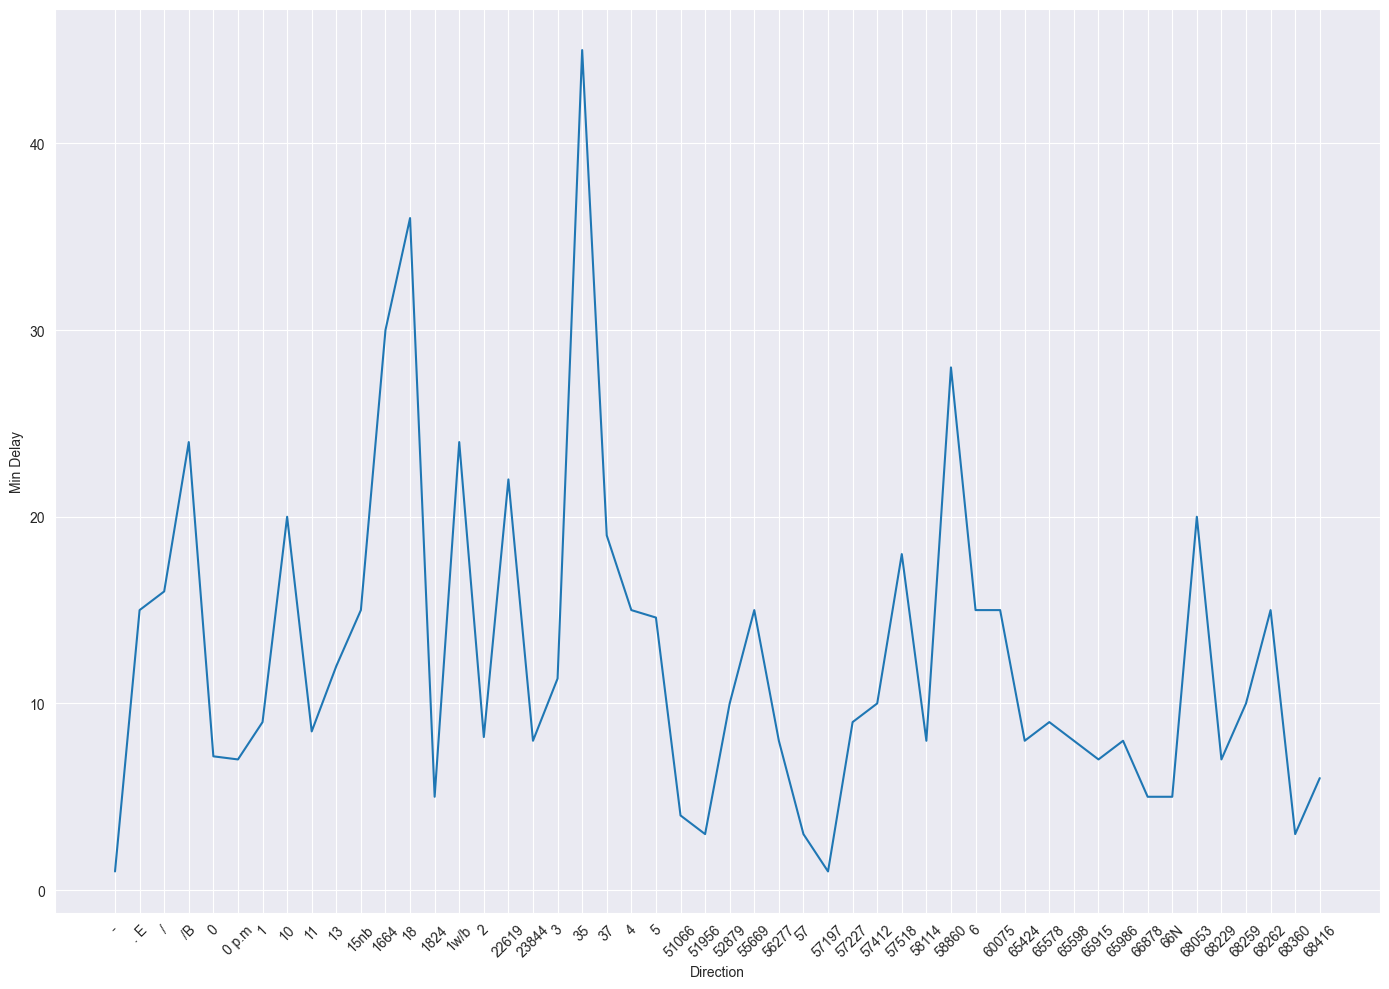

In [8]:
plt.figure(figsize=(14, 10))
sns.lineplot(x='Direction', y='Min Delay', data=delay_by_direction.head(50))
plt.xticks(rotation=45)
plt.tight_layout()

Vehicle (4982 Missing Rows)
- Note: Vehicle number ranges from 0 to 98035


In [9]:
#finding the average delay for each vehicle

vehicle_delay_df = df.groupby('Vehicle')['Min Delay'].mean().reset_index()


In [10]:
#finding count of delays for each vehicle
df_filtered = df[df['Vehicle'].isin(vehicle_delay_df['Vehicle'])]
vehicle_count_filtered = df_filtered['Vehicle'].value_counts(dropna=False)
df_vehicle_count_filtered = vehicle_count_filtered.reset_index().sort_values('Vehicle', ascending=False)


In [11]:
##Adding the 2 dataframs before this cell together to plot min delay with the counts.

df_merged_delay_count = pd.merge(vehicle_delay_df, df_vehicle_count_filtered, on='Vehicle')

In [12]:
df_merged_delay_count

,Vehicle,Min Delay,count
0,0.0,45.903937,9931
1,1.0,12.540541,37
2,2.0,5.000000,2
3,3.0,11.500000,2
4,4.0,9.500000,2
...,...,...,...
3843,91336.0,8.000000,1
3844,92387.0,18.000000,1
3845,92521.0,8.000000,1
3846,93561.0,10.000000,1


- For the table above, the first column is the vehicle #, second column is the mean min delay for that vehicle and third is the number of recorded delays for each vehicle. What is interesting is that for the vehicles with super high delays, they have very few counts. Let’s see how it looks when you plot it. 

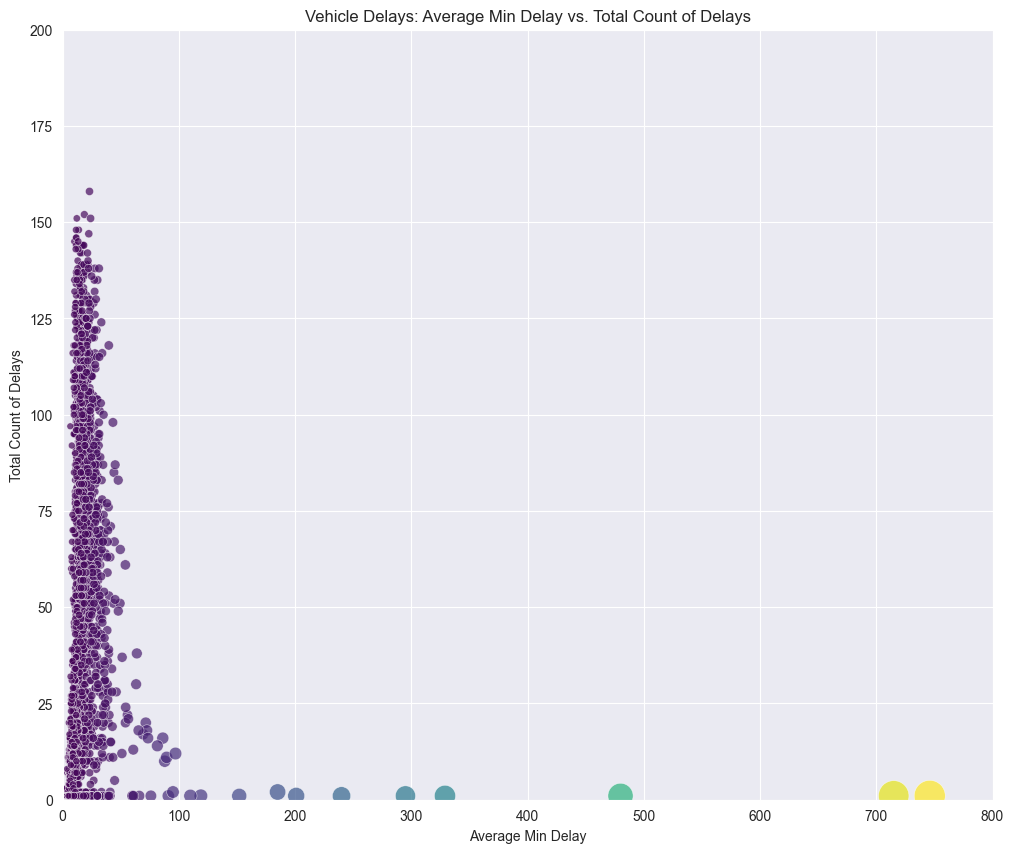

In [13]:
plt.figure(figsize=(12, 10))
plt.xlim(0, 800)
plt.ylim(0,200)
scatter = sns.scatterplot(
    x='Min Delay',
    y='count',
    data=df_merged_delay_count,
    size='Min Delay',  # Use size to indicate delay magnitude
    sizes=(20, 500),           # Set size range for markers
    hue='Min Delay',   # Color by average min delay
    palette='viridis',
    alpha=0.7,
    legend=None
)


# Set limits and labels
plt.xlabel('Average Min Delay')
plt.ylabel('Total Count of Delays')
plt.title('Vehicle Delays: Average Min Delay vs. Total Count of Delays')

# Show plot
plt.show()

Each point is a representation of every vehicle. On the X axis is the average min delay for the vehicles and the Y-Axis is the total count of delays. The majority of the points have a low average min delay showing that most vehicles perform similarly in delays. The reason why some vehicles have a high average minimum delay is due to the lack of data. For example Vehicle 7892 has an average delay of 746 yet only 1 data point. 

Hypothetically, lets say Vehicle 1234 has a delay of 700 minutes but only one incident recorded, this doesn't provide enough evidence that Vehicle 1234 is prone to delays. The combination of both low frequency and high delays introduces a lot of noise into the data. This indicates that the vehicle does not have much predictive power for min delays. 

When we look at vehicles with more recorded incident reports, we can see that the average min delay is significantly lower and more realistic. With most vehicles having an average delay anywhere from around 0 to 100. This shows that there is no correlation between vehicles and min delay and the only reason there is a disparity between certain vehicles is the lack of data for some vehicles. 

Additionally looking at the plot below (the same thing as the plot above but zoomed out to show all the data points),  you can see a super small point near the 1000 ticker on the Y-Axis. That point is for Vehicle 0 with about 9931 counts for delays. This obviously is an inputting error as this is a HUGE outlier compared to the rest of the dataset. To me, it seems like Vehicle 0 was just a filler value to not show any NaN values. Having Vehicle 0 and using it in the dataset for model training could be really bad. 


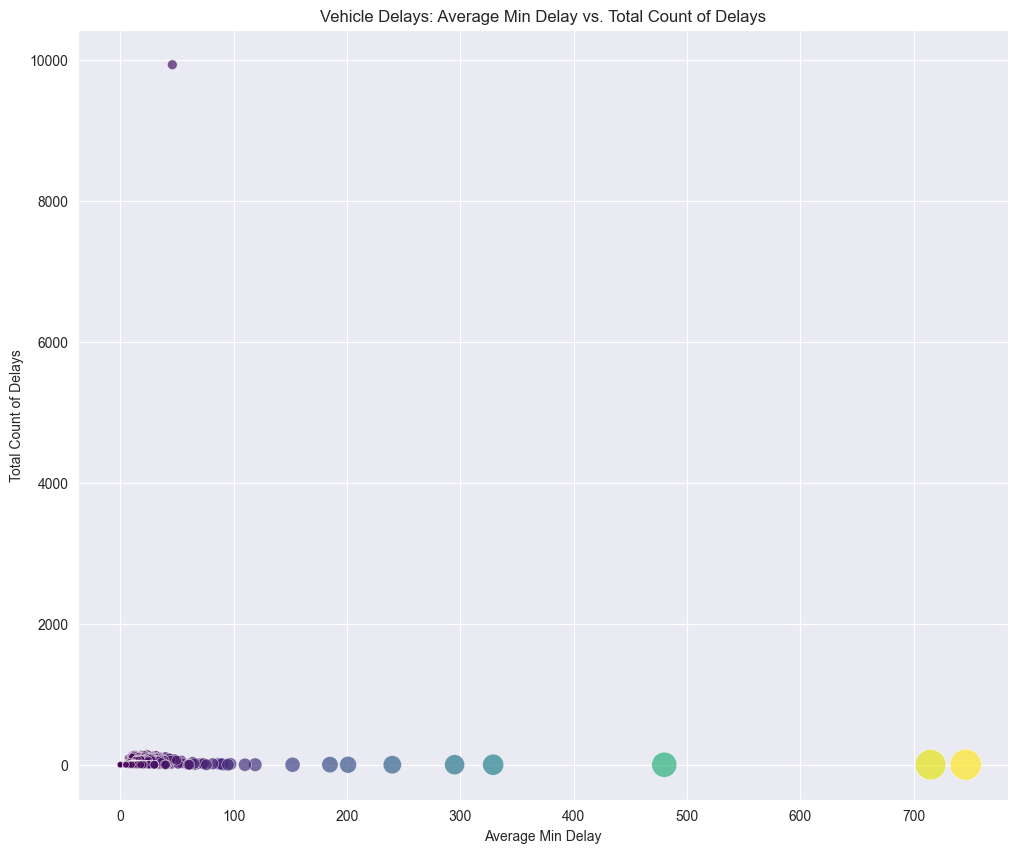

In [14]:
plt.figure(figsize=(12, 10))

scatter = sns.scatterplot(
    x='Min Delay',
    y='count',
    data=df_merged_delay_count,
    size='Min Delay',  # Use size to indicate delay magnitude
    sizes=(20, 500),           # Set size range for markers
    hue='Min Delay',   # Color by average min delay
    palette='viridis',
    alpha=0.7,
    legend=None
)


# Set limits and labels
plt.xlabel('Average Min Delay')
plt.ylabel('Total Count of Delays')
plt.title('Vehicle Delays: Average Min Delay vs. Total Count of Delays')

# Show plot
plt.show()

### Key Takeaways for Missing Data in Dataset:

- Drop missing rows for Route, Location, Min Delay, and Min Gap 

- Drop Direction column due to irrelevance to predicting delays, a huge portion (13%) of the values in the column missing, and poor naming for directions which has no meaning at all. 

- Drop Vehicle Column due to clear mislabelling of vehicles (vehicle 0 used over 10000 times), certain vehicles a low fruequency of recorded delays and super high delays which can pose a threat to model training. 

In [15]:
df_cleaned = df.dropna(subset=['Route', 'Location', 'Min Delay', 'Min Gap'])

In [16]:
df_cleaned = df_cleaned.drop(['Direction','Vehicle'], axis=1)

In [17]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 201814 entries, 0 to 203298
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Date       201814 non-null  datetime64[ns]
 1   Route      201814 non-null  object        
 2   Time       201814 non-null  object        
 3   Day        201814 non-null  object        
 4   Location   201814 non-null  object        
 5   Incident   201814 non-null  object        
 6   Min Delay  201814 non-null  float64       
 7   Min Gap    201814 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 13.9+ MB


In total after cleaning the dataset, we are only lost 1485 rows of data (0.7% of total data)

### Are there any significant outliers in the data that may skew our analysis or model training?

In [18]:
df_cleaned[['Min Delay','Min Gap']].describe()

,Min Delay,Min Gap
count,201814.000000,201814.000000
mean,19.396162,31.396097
std,49.388990,51.168470
min,-30.000000,0.000000
25%,8.000000,16.000000
50%,10.000000,20.000000
75%,19.000000,36.000000
max,1244.000000,1254.000000


Seems like there are some significant outliers. For example for Min Delay, the lowest is -30 and the highest is 1244. 

In [19]:
# I choose to remove all min delay and min gap > 0 as it doesn't make sense that there can be negative delays and have no delay in a dataset that records delays. 

outliars_removed_df = df_cleaned[(df_cleaned['Min Delay'] >0) & (df_cleaned['Min Gap'] >0)]


In [20]:
outliars_removed_df['Min Delay'].value_counts()

Min Delay
10.0     33689
20.0     14354
8.0      13850
9.0      12131
12.0     10862
         ...  
625.0        1
611.0        1
545.0        1
930.0        1
926.0        1
Name: count, Length: 749, dtype: int64

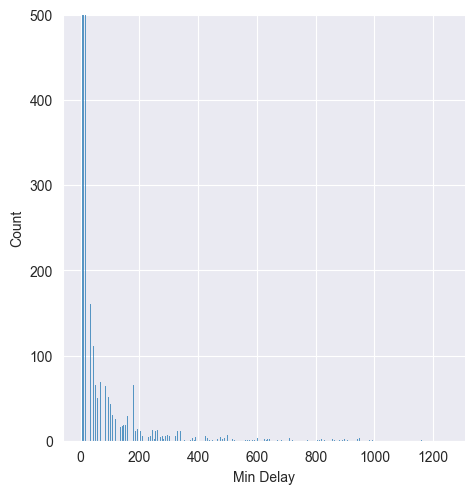

In [21]:
sns.displot(data=outliars_removed_df, x='Min Delay')
plt.ylim(0,500)
plt.show()

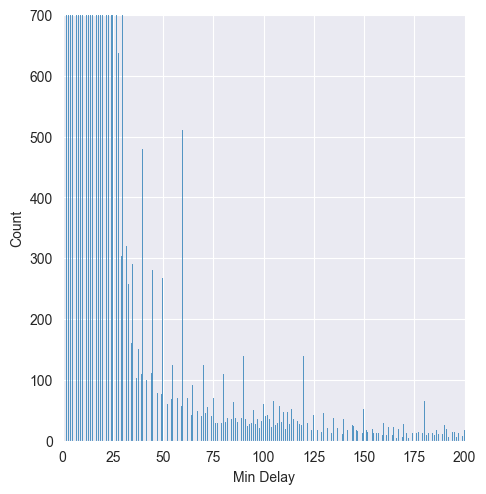

In [22]:
sns.displot(data=outliars_removed_df, x='Min Delay')
plt.ylim(0,700)
plt.xlim(0,200)
plt.show()

Checking the distribution for Min Delay. Since bus delays are super unpredictible by nature, not suprised that there is no normal distribution. For the following section for identifying outliers, it is important to keep in mind when choosing a technique for identifying an outlier. 

In [23]:
outliars_removed_df[['Min Delay','Min Gap']].describe()

,Min Delay,Min Gap
count,189069.000000,189069.000000
mean,20.569961,33.495306
std,50.764712,52.195852
min,1.000000,1.000000
25%,9.000000,18.000000
50%,11.000000,22.000000
75%,20.000000,37.000000
max,1244.000000,1254.000000


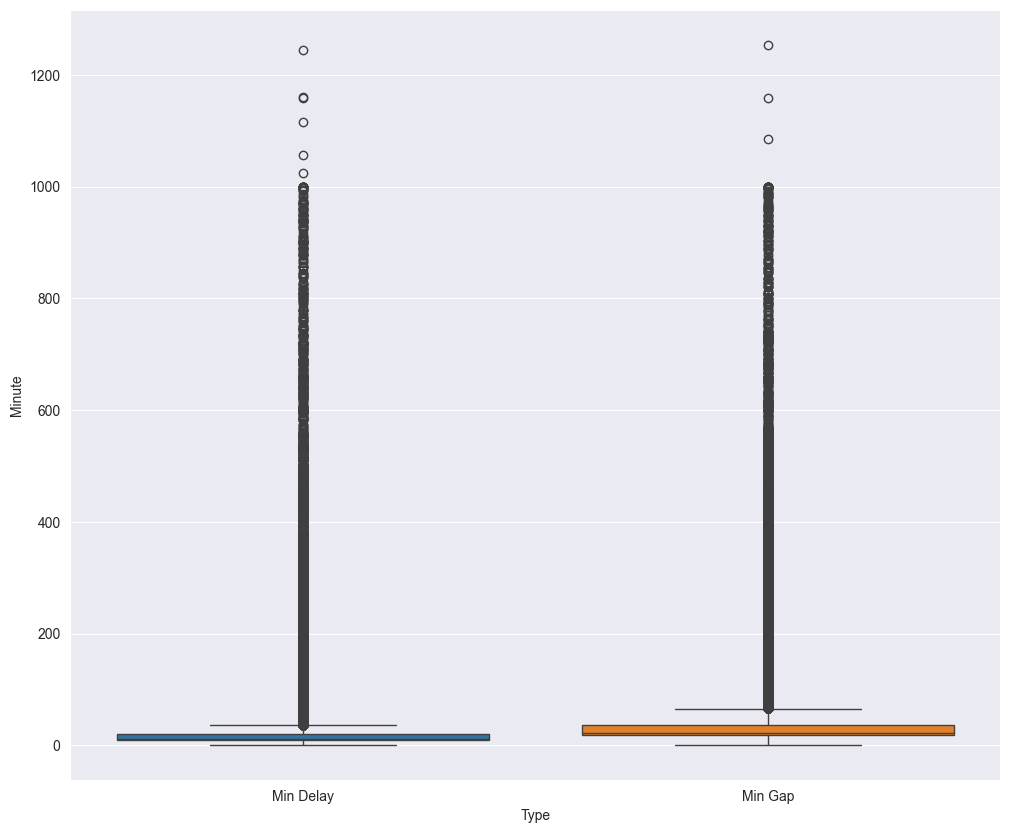

In [24]:
plt.figure(figsize=(12, 10))

sns.boxplot(outliars_removed_df)

# Set limits and labels
plt.xlabel('Type')
plt.ylabel('Minute')


# Show plot
plt.show()

There are definitely a lot of outliers for both Min Delay and Min Gap. Looking back at the previous section, a lot of the incidents with super high delays are from isolated incidents that occurred on one vehicle. There are definitely a lot of outliers in the dataset which may skew our results. 

### Methods to Remove Outliars:
- DBSCAN
- IQR
- Modified Z-Test


Numerical Representation of Date

In [25]:
outliars_removed_df

,Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap
0,2014-01-01,95,00:23:00,Wednesday,York Mills station,Mechanical,10.0,20.0
1,2014-01-01,102,00:55:00,Wednesday,Entire run for route,General Delay,33.0,66.0
2,2014-01-01,54,01:28:00,Wednesday,lawrence and Warden,Mechanical,10.0,20.0
3,2014-01-01,112,01:30:00,Wednesday,Kipling Station,Emergency Services,18.0,36.0
4,2014-01-01,24,01:37:00,Wednesday,VP and Ellesmere,Investigation,10.0,20.0
...,...,...,...,...,...,...,...,...
203293,2024-08-31,50,00:47,Saturday,ISLINGTON STATION,Cleaning - Unsanitary,25.0,53.0
203294,2024-08-31,38,00:55,Saturday,ROGUEE HILL GO STATION,Vision,16.0,32.0
203295,2024-08-31,32,01:06,Saturday,EGLINTON AND DUFFERIN,Vision,15.0,30.0
203296,2024-08-31,114,01:09,Saturday,CARLAW AND LAKESHORE,Vision,15.0,30.0


In [26]:
outliars_removed_df['Day_of_Week'] = outliars_removed_df['Day']
outliars_removed_df['Day'] = outliars_removed_df['Date'].dt.day
outliars_removed_df['Month'] = outliars_removed_df['Date'].dt.month
outliars_removed_df['Year'] = outliars_removed_df['Date'].dt.year

C:\Users\belug\AppData\Local\Temp\ipykernel_7548\783874447.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliars_removed_df['Day_of_Week'] = outliars_removed_df['Day']
C:\Users\belug\AppData\Local\Temp\ipykernel_7548\783874447.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliars_removed_df['Day'] = outliars_removed_df['Date'].dt.day
C:\Users\belug\AppData\Local\Temp\ipykernel_7548\783874447.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

In [27]:
outliars_removed_df

,Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Day_of_Week,Month,Year
0,2014-01-01,95,00:23:00,1,York Mills station,Mechanical,10.0,20.0,Wednesday,1,2014
1,2014-01-01,102,00:55:00,1,Entire run for route,General Delay,33.0,66.0,Wednesday,1,2014
2,2014-01-01,54,01:28:00,1,lawrence and Warden,Mechanical,10.0,20.0,Wednesday,1,2014
3,2014-01-01,112,01:30:00,1,Kipling Station,Emergency Services,18.0,36.0,Wednesday,1,2014
4,2014-01-01,24,01:37:00,1,VP and Ellesmere,Investigation,10.0,20.0,Wednesday,1,2014
...,...,...,...,...,...,...,...,...,...,...,...
203293,2024-08-31,50,00:47,31,ISLINGTON STATION,Cleaning - Unsanitary,25.0,53.0,Saturday,8,2024
203294,2024-08-31,38,00:55,31,ROGUEE HILL GO STATION,Vision,16.0,32.0,Saturday,8,2024
203295,2024-08-31,32,01:06,31,EGLINTON AND DUFFERIN,Vision,15.0,30.0,Saturday,8,2024
203296,2024-08-31,114,01:09,31,CARLAW AND LAKESHORE,Vision,15.0,30.0,Saturday,8,2024


## DBSCAN

In [7]:
dbscan_df = outliars_removed_df.drop(['Date','Route','Location','Incident', 'Day_of_Week', 'Time','Day','Month', 'Year'], axis=1)

dbscan_df

,Min Delay,Min Gap
0,10,20
1,33,66
2,10,20
3,18,36
4,10,20
...,...,...
189064,25,53
189065,16,32
189066,15,30
189067,15,30


In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_X = scaler.fit_transform(dbscan_df)

In [9]:
from sklearn.cluster import DBSCAN

In [ ]:
outlier_percent = []

for eps in np.linspace(0.1,1.5,10):
    
    # Create Model
    dbscan = DBSCAN(eps=eps,min_samples=10)
    dbscan.fit(scaled_X)
   
     
    # Log percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    
    outlier_percent.append(perc_outliers)

In [ ]:
sns.lineplot(x=np.linspace(0.001,3,50),y=outlier_percent)
plt.ylabel("Percentage of Points Classified as Outliers")
plt.xlabel("Epsilon Value")

### Using IQR to remove outliars

In [28]:
import numpy as np

In [29]:
q75, q25 = np.percentile(outliars_removed_df['Min Gap'], [75,25])
IQR = q75 -q25

lower_limit_gap = q25 - 1.5*(IQR)
upper_limit_gap = q75 + 1.5*(IQR)

In [30]:
q75, q25 = np.percentile(outliars_removed_df['Min Delay'], [75,25])
IQR = q75 -q25
lower_limit = q25 - 1.5*(IQR)
upper_limit = q75 + 1.5*(IQR)
data_IQR = outliars_removed_df[(outliars_removed_df['Min Delay'] >= lower_limit) & (outliars_removed_df['Min Delay'] <= upper_limit) & (outliars_removed_df['Min Gap'] >= lower_limit_gap) & (outliars_removed_df['Min Gap'] <= upper_limit_gap)]

In [31]:
data_IQR[['Min Delay','Min Gap']].describe()

,Min Delay,Min Gap
count,178849.000000,178849.000000
mean,13.220823,25.777276
std,7.009402,13.447939
min,1.000000,1.000000
25%,9.000000,17.000000
50%,10.000000,20.000000
75%,18.000000,34.000000
max,36.000000,65.000000


Using IQR, it resulted in 10342 rows of data lost. 

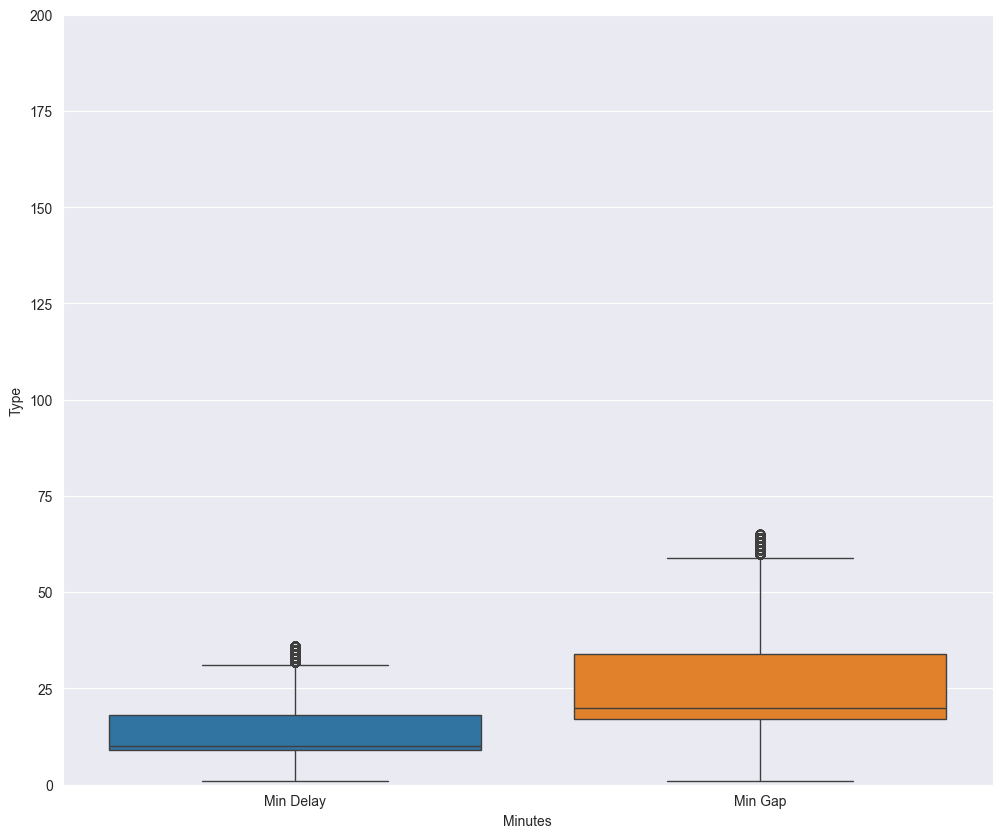

In [33]:
plt.figure(figsize=(12, 10))
plt.xlim(0, 800)
plt.ylim(0,200)
sns.boxplot(data_IQR[['Min Delay','Min Gap']])

# Set limits and labels
plt.xlabel('Minutes')
plt.ylabel('Type')


# Show plot
plt.show()

### Using Modified Z-Test    


In [63]:
import numpy as np

Info about Modified Z-Score: https://docs.oracle.com/en/cloud/saas/planning-budgeting-cloud/pfusu/insights_metrics_MODIFIED_Z_SCORE.html

I wanted to use Modified Z-Score instead because by using a traditional Z-score, it is calculated with standard deviation and mean which assumes a normal distribution in the dataset. Given the unpredictable nature of bus delays, there are a lot of outliers and randomness in terms of bus delays. By using the Modified Z-Score which uses the median and median absolute deviation, it can give a more accurate representation of identifying outliers in the dataset and isn't as heavily skewed to the outliers as much as the normal Z-Score. 


In [64]:
modified_z_test_df = outliars_removed_df.copy()


In [65]:
def calculate_mod_z(col):
    median = col.median()
    MAD = np.median(np.abs(col - median))
    return 0.6745 * (col - median) / MAD

In [66]:
modified_z_test_df['Modified Z Delay'] = calculate_mod_z(modified_z_test_df['Min Delay'])
modified_z_test_df['Modified Z Gap'] = calculate_mod_z(modified_z_test_df['Min Gap'])

modified_z_dataset = modified_z_test_df[
    (modified_z_test_df['Modified Z Delay'].abs() < 4.5) &
    (modified_z_test_df['Modified Z Gap'].abs() < 4.5)
]

In [67]:
modified_z_dataset[['Min Delay','Min Gap']].describe()

,Min Delay,Min Gap
count,179322.000000,179322.000000
mean,13.273318,25.881420
std,7.080997,13.593257
min,1.000000,1.000000
25%,9.000000,17.000000
50%,10.000000,20.000000
75%,18.000000,34.000000
max,37.000000,75.000000


In [68]:
modified_z_dataset = modified_z_dataset.drop(['Modified Z Delay','Modified Z Gap'], axis=1)

In [69]:
modified_z_dataset

,Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Day_of_Week,Month,Year
0,2014-01-01,95,00:23:00,1,York Mills station,Mechanical,10.0,20.0,Wednesday,1,2014
1,2014-01-01,102,00:55:00,1,Entire run for route,General Delay,33.0,66.0,Wednesday,1,2014
2,2014-01-01,54,01:28:00,1,lawrence and Warden,Mechanical,10.0,20.0,Wednesday,1,2014
3,2014-01-01,112,01:30:00,1,Kipling Station,Emergency Services,18.0,36.0,Wednesday,1,2014
4,2014-01-01,24,01:37:00,1,VP and Ellesmere,Investigation,10.0,20.0,Wednesday,1,2014
...,...,...,...,...,...,...,...,...,...,...,...
203293,2024-08-31,50,00:47,31,ISLINGTON STATION,Cleaning - Unsanitary,25.0,53.0,Saturday,8,2024
203294,2024-08-31,38,00:55,31,ROGUEE HILL GO STATION,Vision,16.0,32.0,Saturday,8,2024
203295,2024-08-31,32,01:06,31,EGLINTON AND DUFFERIN,Vision,15.0,30.0,Saturday,8,2024
203296,2024-08-31,114,01:09,31,CARLAW AND LAKESHORE,Vision,15.0,30.0,Saturday,8,2024


### Key takeaways:
- Both methods are good at identifying outliars. Given that the bus with the highest delay has an average delay of 30 minutes. I think having a little extra room by allowing values with z < 4.5. I think testing both methods and exploring the dataset, having anything above high 30's to 40 is would be considered an outliar. 

### Feature Specific Questions
- The dataset used for this section is the dataset with outliers removed using Modified Z-Test

 ### Are there any routes that vary significantly in delays from others?


In [41]:
modified_z_dataset['Route'].nunique()

378

In [42]:
modified_z_dataset['Route'].unique()

array([95, 102, 54, 112, 24, 129, 36, 53, 320, 96, 12, 35, 32, 29, 300,
       302, 809, 161, 58, 41, 37, 34, 21, 86, 7, 42, 310, 60, 199, 5, 165,
       97, 91, 116, 39, 43, 192, 59, 125, 103, 106, 25, 68, 191, 6, 190,
       9, 85, 89, 26, 90, 46, 52, 104, 10, 113, 133, 45, 131, 100, 107,
       47, 72, 55, 51, 84, 63, 132, 57, 11, 16, 196, 20, 69, 130, 23, 75,
       122, 81, 98, 17, 127, 92, 15, 83, 64, 108, 66, 79, 143, 71, 76,
       144, 110, 50, 87, 80, 105, 757, 134, 33, 61, 48, 117, 38, 135, 88,
       22, 307, 324, 303, 309, 67, 321, 126, 56, 160, 139, 44, 14, 142,
       111, 40, 123, 65, 31, 94, 756, 70, 78, 168, 73, 109, 77, 701, 810,
       354, 322, 801, 115, 224, 28, 172, 124, 145, 49, 313, 305, 162, 167,
       74, 120, 62, 780, 169, 754, 352, 8, 1, 30, 709, 171, 316, 141, 311,
       385, 319, 254, 2, 802, 702, 909, 19, 3, 296, 329, 353, 195, 198,
       989, 543, 773, 779, 308, 82, 511, 807, 502, 771, 999, 312, 121,
       804, 504, 774, 904, 414, 708, 736, 341, 363

In [43]:
delay_df = modified_z_dataset.groupby('Route')['Min Delay'].mean()

C:\Users\belug\AppData\Local\Temp\ipykernel_7548\3520898176.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Route', y='Min Delay', data=highest_delay_route_df, palette='viridis')


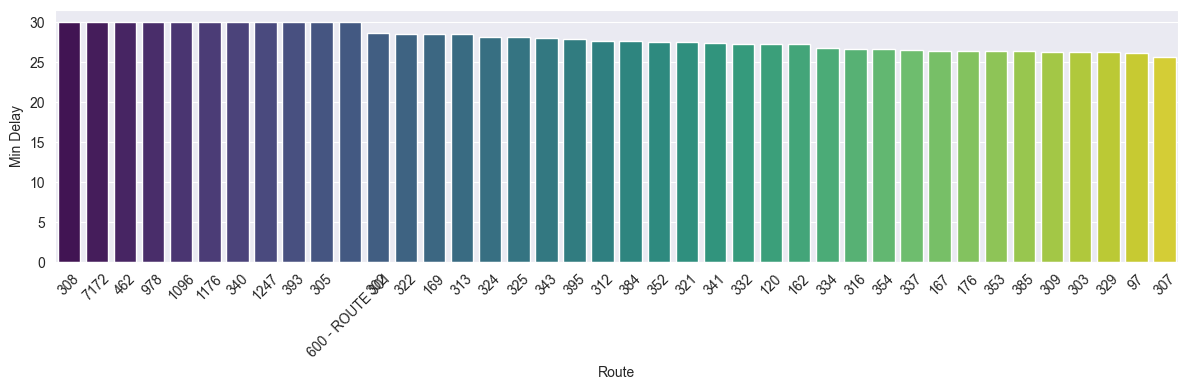

In [44]:
highest_delay_route_df = delay_df.sort_values( ascending=False).reset_index().head(40)
highest_delay_route_df['Route'] = highest_delay_route_df['Route'].astype(str)

plt.figure(figsize=(12,4))
sns.barplot(x='Route', y='Min Delay', data=highest_delay_route_df, palette='viridis')
plt.xticks(rotation=45)
plt.tight_layout()

C:\Users\belug\AppData\Local\Temp\ipykernel_7548\4264809333.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Route', y='Min Delay', data=lowest_delay_route_df, palette='viridis')


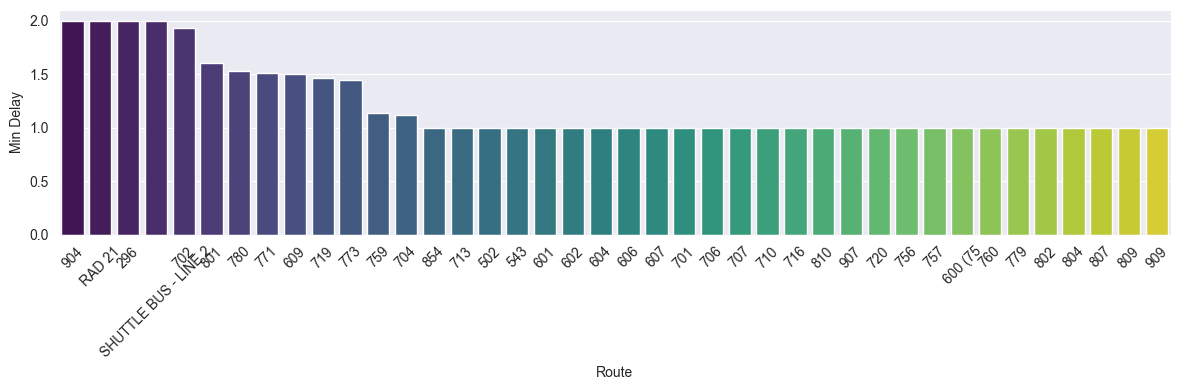

In [45]:
lowest_delay_route_df = delay_df.sort_values( ascending=False).reset_index().tail(40)
lowest_delay_route_df['Route'] = lowest_delay_route_df['Route'].astype(str)
plt.figure(figsize=(12,4))
sns.barplot(x='Route', y='Min Delay', data=lowest_delay_route_df, palette='viridis')
plt.xticks(rotation=45)
plt.tight_layout()

### Key Takeaways:
- Looking at the barplots above, they compare each route with it's average min delay. It does indicate that certain routes are a lot more congested than others. Another thing to keep in mind is that some of the route names are not labelled correctly. I think since there are only a few values in the Route column that don't have the route number, it might be easy to manually determine which route number is correlated to the route that isn't labelled the best.

 ### Are there any features that seem largely irrelevant? Ex: Are we trying to predict the type of delay, or can we chuck that column

Previously Discussed Columns that are Irrelevant:
- Vehicles
- Direction

Features that are Important:
- Date
- Time 
- Route
- Min Delay
- Min Gap
- Location

Features to take a look at:
- Incident

In [51]:
modified_z_dataset['Incident'].unique()

array(['Mechanical', 'General Delay', 'Emergency Services',
       'Investigation', 'Late Leaving Garage', 'Utilized Off Route',
       'Diversion', 'Late Leaving Garage - Operator',
       'Late Leaving Garage - Mechanical', 'Vision',
       'Late Leaving Garage - Management', 'Late Leaving Garage - Vision',
       'Security', 'Operations - Operator', 'Cleaning',
       'Road Blocked - NON-TTC Collision', 'Collision - TTC',
       'Management', 'Held By', 'Late Leaving Garage - Operations',
       'Cleaning - Unsanitary', 'Late Entering Service',
       'Cleaning - Disinfection'], dtype=object)

C:\Users\belug\AppData\Local\Temp\ipykernel_7548\3215746591.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Incident', y='Min Delay', data=incident_type_mean_df, palette='viridis')


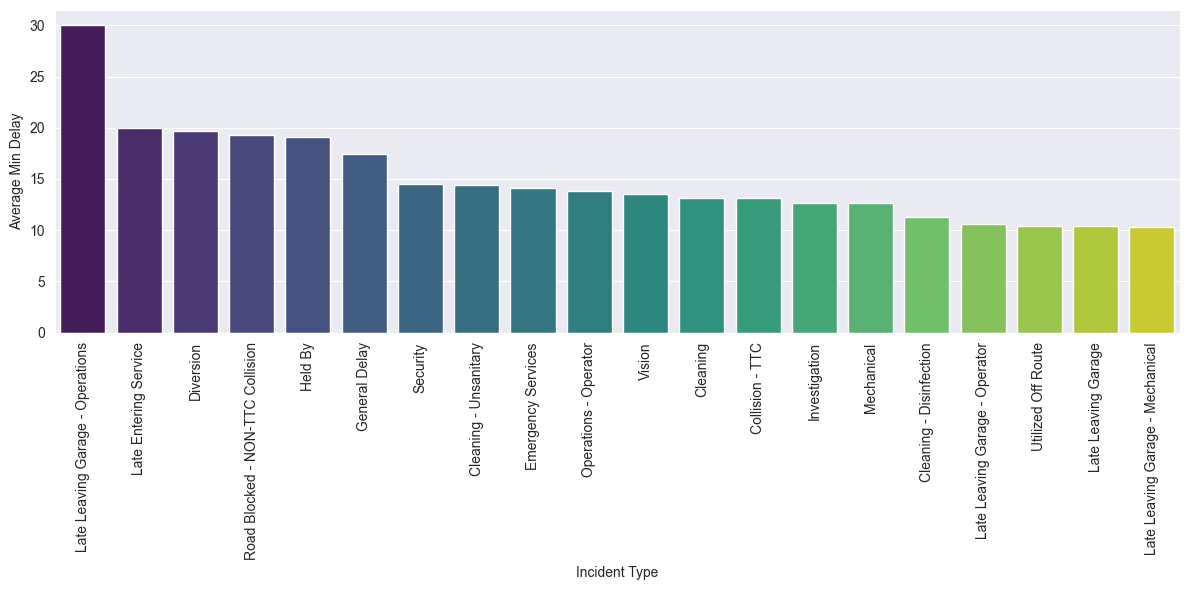

In [52]:
incident_type_mean = modified_z_dataset.groupby('Incident')['Min Delay'].mean()
incident_type_mean_df = incident_type_mean.sort_values( ascending=False).reset_index().head(20)


plt.figure(figsize=(12,6))
sns.barplot(x='Incident', y='Min Delay', data=incident_type_mean_df, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Incident Type')
plt.ylabel('Average Min Delay')
plt.tight_layout()

C:\Users\belug\AppData\Local\Temp\ipykernel_7548\2455341167.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Incident', y='Min Delay', data=incident_type_sum_df, palette='viridis')


<Axes: xlabel='Incident', ylabel='Min Delay'>

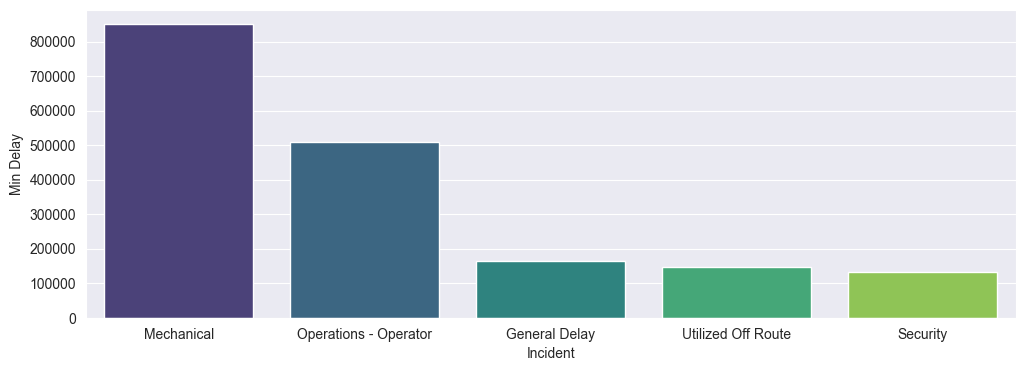

In [53]:
incident_type_sum = modified_z_dataset.groupby('Incident')['Min Delay'].sum()
incident_type_sum_df = incident_type_sum.sort_values( ascending=False).reset_index().head(5)

plt.figure(figsize=(12,4))
sns.barplot(x='Incident', y='Min Delay', data=incident_type_sum_df, palette='viridis')

### Key Takeaways:
- Incident Feature seems to have some correlation to min delay. There are slight trends in min delay when looking at the type of incident. It is worth keeping in the dataset.

### Columns to Drop & Keep
Drop:
- Vehicles
- Direction

Keep:
- Date
- Time 
- Route
- Min Delay
- Min Gap
- Location
- Incident 





In [70]:
modified_z_dataset

,Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Day_of_Week,Month,Year
0,2014-01-01,95,00:23:00,1,York Mills station,Mechanical,10.0,20.0,Wednesday,1,2014
1,2014-01-01,102,00:55:00,1,Entire run for route,General Delay,33.0,66.0,Wednesday,1,2014
2,2014-01-01,54,01:28:00,1,lawrence and Warden,Mechanical,10.0,20.0,Wednesday,1,2014
3,2014-01-01,112,01:30:00,1,Kipling Station,Emergency Services,18.0,36.0,Wednesday,1,2014
4,2014-01-01,24,01:37:00,1,VP and Ellesmere,Investigation,10.0,20.0,Wednesday,1,2014
...,...,...,...,...,...,...,...,...,...,...,...
203293,2024-08-31,50,00:47,31,ISLINGTON STATION,Cleaning - Unsanitary,25.0,53.0,Saturday,8,2024
203294,2024-08-31,38,00:55,31,ROGUEE HILL GO STATION,Vision,16.0,32.0,Saturday,8,2024
203295,2024-08-31,32,01:06,31,EGLINTON AND DUFFERIN,Vision,15.0,30.0,Saturday,8,2024
203296,2024-08-31,114,01:09,31,CARLAW AND LAKESHORE,Vision,15.0,30.0,Saturday,8,2024


Right now there are only 2 fully numerical columns (Min Gap and Min Delay) which is why the correlation matrix looks a bit empty...

Some potential ideas:
- Mapping the Location of bus stop to coordinates to give them a numerical representation. Also opens the door for spatial analysis(maybe calculating the distance between stations or geographical distributions for delays). It also integrates well with GTFS data, weather data. 
- Breaking down the date to day, day of week(number instead of a string), month.

In [71]:
numerical_df = modified_z_dataset.select_dtypes(include=['number'])
corr_mat = numerical_df.corr()
corr_mat

,Day,Min Delay,Min Gap,Month,Year
Day,1.000000,-0.002438,-0.004029,-0.011456,-0.020270
Min Delay,-0.002438,1.000000,0.942045,0.106911,0.181356
Min Gap,-0.004029,0.942045,1.000000,0.119994,0.200406
Month,-0.011456,0.106911,0.119994,1.000000,0.518284
Year,-0.020270,0.181356,0.200406,0.518284,1.000000


It isnt a suprise that Min Delay and Min Gap are super correlated as Min Gap relies in Min Delay. 

Apart from Min Gap and Min Delay, from a logical standpoint, there shouldnt be high collinearity between other columns. 

Some potential ideas for data:
- Mapping the Location of bus stop to coordinates (long, lat) to give them a numerical representation. Also opens the door for spatial analysis(maybe calculating the distance between stations or geographical distributions for delays). It also integrates well with GTFS data, weather data for better analysis. 
- Breaking down the date to day, month, year (numerical representation).

In [73]:
modified_z_dataset.to_excel(r'Fully_Processed_TTC_Bus_Data.xlsx', index=None, header=True)